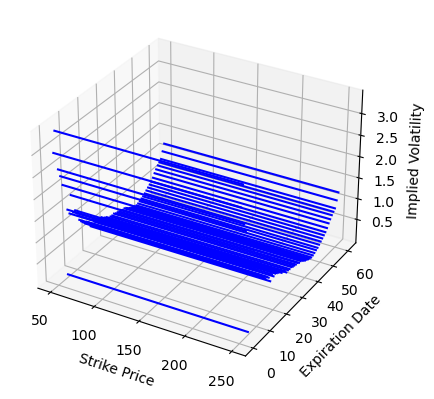

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock ticker symbol and retrieve the option data
symbol = "AAPL"
option_data = yf.Ticker(symbol).option_chain()

# Calculate the implied volatility for each option contract
iv_data = []
for i in range(len(option_data.calls)):
    iv = option_data.calls.iloc[i]['impliedVolatility']
    iv_data.append(iv)

# Get the strike prices and expiration dates
strike_prices = option_data.calls['strike']
expiration_dates = option_data.calls['lastTradeDate']

# Create a 2D numpy array of the implied volatility data
iv_array = np.array(iv_data).reshape(len(expiration_dates), -1)

# Plot the data as a volatility cone
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(expiration_dates)):
    ax.plot(strike_prices, np.full(len(strike_prices), i), iv_array[i], color='blue')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Expiration Date')
ax.set_zlabel('Implied Volatility')
plt.show()
